# Diagnostic Metrics

**Course:** HUDK4050, Week 10

**Author:** Yutong Shen

**Assignment:** ICE7

## Evaluate ACA2 Model Performance

Logistic Regression and Decision Tree is used in ACA2. So confusion matrix, ROC curves and AUC curves can be used to evaluate the model performance.

**Import the ACA2 Model**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# read the training data
data = pd.read_csv("aca2_dataset_training.csv")
data

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [24]:
# create a dummy variable for ONTASK
dummyONTASK = pd.get_dummies(data['ONTASK'], prefix = 'ONTASK') 
data = pd.concat([data, dummyONTASK], axis=1)
data = data.drop(['ONTASK', 'ONTASK_N'], axis=1)

# create a dummy variable for CODER
dummyCODER = pd.get_dummies(data['CODER'], prefix = 'CODER') 
data = pd.concat([data, dummyCODER], axis=1)
data = data.drop(['CODER', 'CODER_Y'], axis=1)

In [25]:
# convert Activity to a category, then use those category values for label encoding
data['Activity'] = data['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Activity_cat"] = data["Activity"].cat.codes
data = data.drop(['Activity'], axis=1)

# convert SCHOOL to a category, then use those category values for label encoding
data['SCHOOL'] = data['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["SCHOOL_cat"] = data["SCHOOL"].cat.codes
data = data.drop(['SCHOOL'], axis=1)

# convert Class to a category, then use those category values for label encoding
data['Class'] = data['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Class_cat"] = data["Class"].cat.codes
data = data.drop(['Class'], axis=1)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = data.drop(['ONTASK_Y'], axis=1)   # drop the ONTASK_Y column
y = data['ONTASK_Y']
names=pd.DataFrame(X.columns)

# use logistic regression as the model
logit_reg = LogisticRegression(max_iter=2000)

# This is to select 8 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(logit_reg, n_features_to_select=8, step=1) 
myvalues=rfe_mod.fit(X,y)  # to fit
myvalues.support_   # The mask of selected features
myvalues.ranking_   # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1

rankings=pd.DataFrame(myvalues.ranking_) # Make it into data frame

In [28]:
# Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

# Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

          Feature  Rank
1           GRADE     1
3          Gender     1
6     TRANSITIONS     1
7   NumACTIVITIES     1
8   FORMATchanges     1
9      NumFORMATS     1
13        CODER_Z     1
15     SCHOOL_cat     1


8

In [29]:
# read the validation data
testData = pd.read_csv("aca2_dataset_validation.csv")

In [30]:
# create a dummy variable for ONTASK
dummyONTASK2 = pd.get_dummies(testData['ONTASK'], prefix = 'ONTASK') 
testData = pd.concat([testData, dummyONTASK2], axis=1)
testData = testData.drop(['ONTASK', 'ONTASK_N'], axis=1)

# create a dummy variable for CODER
dummyCODER2 = pd.get_dummies(testData['CODER'], prefix = 'CODER') 
testData = pd.concat([testData, dummyCODER2], axis=1)
testData = testData.drop(['CODER', 'CODER_Y'], axis=1)

In [31]:
# convert Activity to a category, then use those category values for label encoding
testData['Activity'] = testData['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Activity_cat"] = testData["Activity"].cat.codes
testData = testData.drop(['Activity'], axis=1)

# convert SCHOOL to a category, then use those category values for label encoding
testData['SCHOOL'] = testData['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["SCHOOL_cat"] = testData["SCHOOL"].cat.codes
testData = testData.drop(['SCHOOL'], axis=1)

# convert Class to a category, then use those category values for label encoding
testData['Class'] = testData['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Class_cat"] = testData["Class"].cat.codes
testData = testData.drop(['Class'], axis=1)

In [34]:
# create an array of X_train, and an arrary for the training labels y_train
X_train1 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_train2 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_train = y.values.reshape(-1, 1)
y_train = np.ravel(y_train)

In [35]:
# Then loading LogisticRegression() and calling for LogisticRegression.fit() 
LogitModel1 = LogisticRegression(max_iter=2000)
LogitModel2 = LogisticRegression(max_iter=2000)
LogitModel1.fit(X_train1, y_train)
LogitModel2.fit(X_train2, y_train)

LogisticRegression(max_iter=2000)

In [36]:
# create an array of X_test, and an arrary for the training labels y_test
X_test1 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_test2 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_test = testData['ONTASK_Y'].values.reshape(-1, 1)

In [38]:
# Feed the X_train in the testing dataset and obtain the predicted Ys
# Predicted value in sklearn logistic regression model
y_pred1 = LogitModel1.predict(X_test1)
y_pred2 = LogitModel2.predict(X_test2)

In [42]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
treeModel1 = DecisionTreeClassifier(max_depth=5)
treeModel2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
treeModel1 = treeModel1.fit(X_train1,y_train)
treeModel2 = treeModel2.fit(X_train2,y_train)

#Predict the response for test dataset
y_pred1 = treeModel1.predict(X_test1)
y_pred2 = treeModel2.predict(X_test2)

### Confusion Matrix

Completed in ACA2.

### ROC curves and AUC curves

Since in ACA2, we found that the Decision Tree models has higher accuracy than the logistic regression models, I will only evaluate the Decision Tree models below.

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Decision Tree 1: ROC AUC=0.584


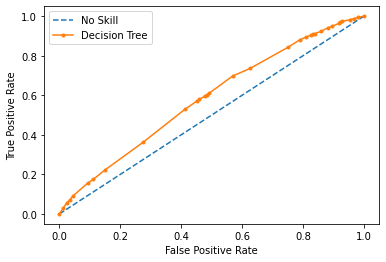

In [50]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = treeModel1.predict_proba(X_test1)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree 1: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Decision Tree 2: ROC AUC=0.609


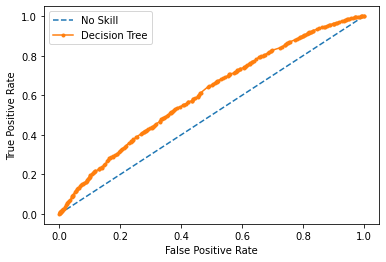

In [51]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = treeModel2.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree 2: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Plots of the ROC curve for the models are created showing that the models have skills. We can see from the plots and AUC that Decision Tree 2 performs better than Decision Tree 1, which is the same as we concluded in ACA2.

## Evaluate ACA3 Model Performance

Clustering is used in ACA3. So Silhouette coefficient, silhouette plot, and Elbow method can be used to evaluate the model performance.

**Import the ACA3 Model**

In [1]:
# Import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import data
data = pd.read_csv("CollegeScorecard.csv", low_memory=False)
data

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


In [3]:
data[data['CURROPER'] == 1]  # currently operating institutions

# Merge NPT4_PUB with NPT4_PRIV, NPT41_PUB with NPT41_PRIV, COSTT4_A with COSTT4_P, and NUM4_PUB with NUM4_PRIV
listRV = ['NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT41_PRIV', 'COSTT4_A', 'COSTT4_P', 'NUM4_PUB', 'NUM4_PRIV']
for x in listRV:
    data[x] = data[x].fillna(0)
    
data['NPT4_PUBPRIV'] = data['NPT4_PUB'] + data['NPT4_PRIV']
data['NPT41_PUBPRIV'] = data['NPT41_PUB'] + data['NPT41_PRIV']
data['COSTT4'] = data['COSTT4_A'] + data['COSTT4_P']
data['NUM4_PUBPRIV'] = data['NUM4_PUB'] + data['NUM4_PRIV']

In [4]:
# Select variables
dataS = data[['UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 
              'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', 'PCTFLOAN']]

In [5]:
# Drop missing values
dataNA = dataS.dropna()

In [6]:
data_noid = dataNA.drop(['UNITID'], axis = 1)

### Silhouette coefficient and silhouette plot

Completed in ACA3

### Elbow Method

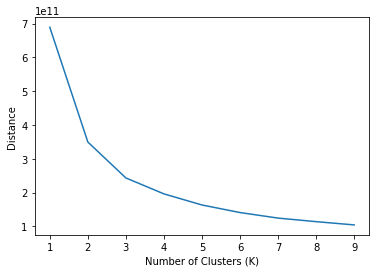

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1,10)
avg_distance=[]

for n in cluster_range:
    clusterer = KMeans(n_clusters = n).fit(data_noid)
    avg_distance.append(clusterer.inertia_)

plt.plot(cluster_range, avg_distance)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distance")
plt.show()

As shown above, by fitting the model with a range of values for K, we can see that the elbow point is when K=2. Our ACA3 model did pick K=2, so the model has selected the optimal number of clusters.